In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, confusion_matrix

In [ ]:
df_train = pd.read_csv('/content/df_train_clean.csv')
df_dev = pd.read_csv('/content/df_dev_clean.csv')
df_test = pd.read_csv('/content/df_test_clean.csv')

In [ ]:
col_text = 'content_clean'      # Chỉnh lại nếu khác
col_label = 'Emotion'    # Chỉnh lại nếu khác

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(df_train[col_text])
X_dev = vectorizer.transform(df_dev[col_text])
X_test = vectorizer.transform(df_test[col_text])

y_train = df_train[col_label]
y_dev = df_dev[col_label]
y_test = df_test[col_label]


In [ ]:
def train_and_eval(model, model_name):
    print(f"\n===== {model_name} =====")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_dev)
    print(classification_report(y_dev, y_pred, digits=4))
    print("F1 Macro:", f1_score(y_dev, y_pred, average='macro'))
    return model


In [ ]:
models = {
    "SVM": LinearSVC(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42, multi_class='multinomial'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}


==== SVM ====
              precision    recall  f1-score   support

       Anger     0.3750    0.3000    0.3333        40
     Disgust     0.4641    0.5379    0.4982       132
   Enjoyment     0.5860    0.6528    0.6176       193
        Fear     0.7436    0.6304    0.6824        46
       Other     0.4882    0.4806    0.4844       129
     Sadness     0.5636    0.5345    0.5487       116
    Surprise     0.6471    0.2973    0.4074        37

    accuracy                         0.5382       693
   macro avg     0.5525    0.4905    0.5103       693
weighted avg     0.5424    0.5382    0.5352       693

F1 Macro: 0.5103


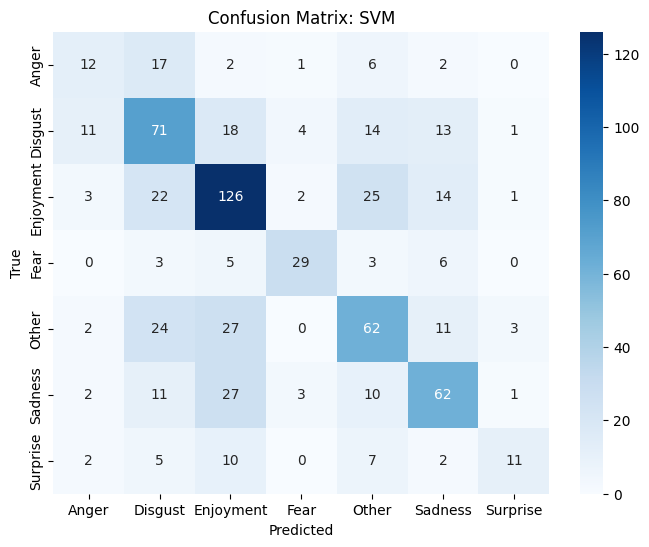


==== Logistic Regression ====


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

       Anger     0.5833    0.1750    0.2692        40
     Disgust     0.5030    0.6288    0.5589       132
   Enjoyment     0.5354    0.7047    0.6085       193
        Fear     0.9048    0.4130    0.5672        46
       Other     0.4453    0.4419    0.4436       129
     Sadness     0.5905    0.5345    0.5611       116
    Surprise     0.7500    0.1622    0.2667        37

    accuracy                         0.5339       693
   macro avg     0.6160    0.4371    0.4679       693
weighted avg     0.5604    0.5339    0.5198       693

F1 Macro: 0.4679


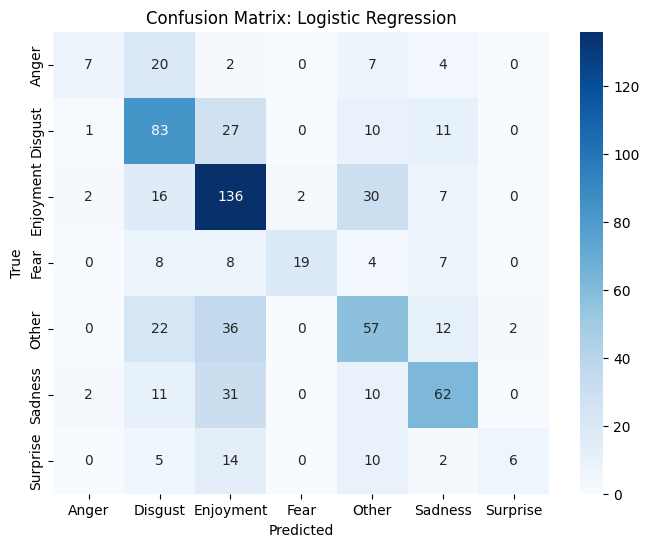


==== Decision Tree ====
              precision    recall  f1-score   support

       Anger     0.1064    0.1250    0.1149        40
     Disgust     0.4101    0.4318    0.4207       132
   Enjoyment     0.4780    0.4508    0.4640       193
        Fear     0.6129    0.4130    0.4935        46
       Other     0.3259    0.3411    0.3333       129
     Sadness     0.3566    0.3966    0.3755       116
    Surprise     0.4333    0.3514    0.3881        37

    accuracy                         0.3911       693
   macro avg     0.3890    0.3585    0.3700       693
weighted avg     0.4016    0.3911    0.3944       693

F1 Macro: 0.3700


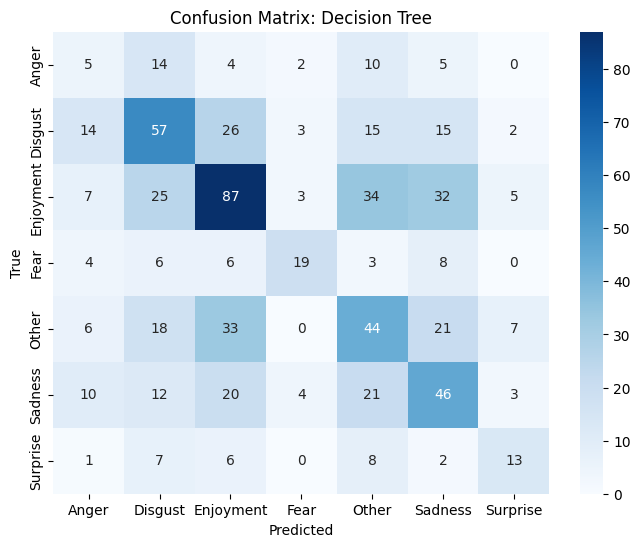


==== Naive Bayes ====
              precision    recall  f1-score   support

       Anger     0.0000    0.0000    0.0000        40
     Disgust     0.4744    0.5606    0.5139       132
   Enjoyment     0.4148    0.8705    0.5619       193
        Fear     0.0000    0.0000    0.0000        46
       Other     0.5405    0.3101    0.3941       129
     Sadness     0.6842    0.3362    0.4509       116
    Surprise     0.0000    0.0000    0.0000        37

    accuracy                         0.4632       693
   macro avg     0.3020    0.2968    0.2744       693
weighted avg     0.4210    0.4632    0.4032       693

F1 Macro: 0.2744


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


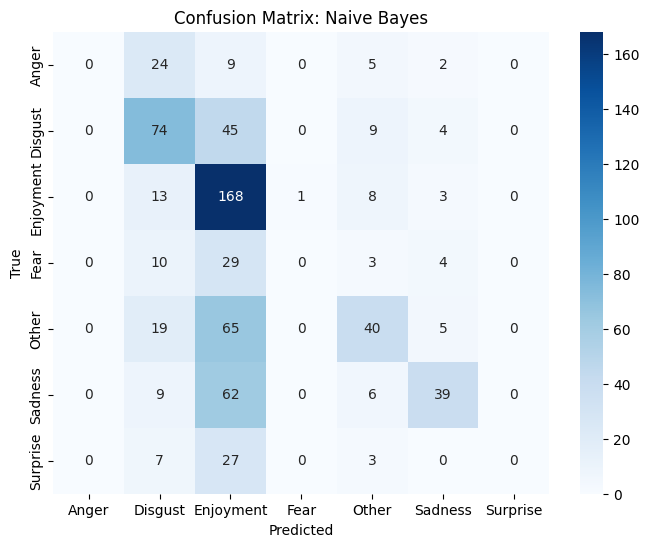


==== Random Forest ====
              precision    recall  f1-score   support

       Anger     0.3333    0.1000    0.1538        40
     Disgust     0.4534    0.5530    0.4983       132
   Enjoyment     0.4981    0.6788    0.5746       193
        Fear     0.7742    0.5217    0.6234        46
       Other     0.4000    0.3876    0.3937       129
     Sadness     0.5385    0.4224    0.4734       116
    Surprise     0.8000    0.2162    0.3404        37

    accuracy                         0.4892       693
   macro avg     0.5425    0.4114    0.4368       693
weighted avg     0.5030    0.4892    0.4759       693

F1 Macro: 0.4368


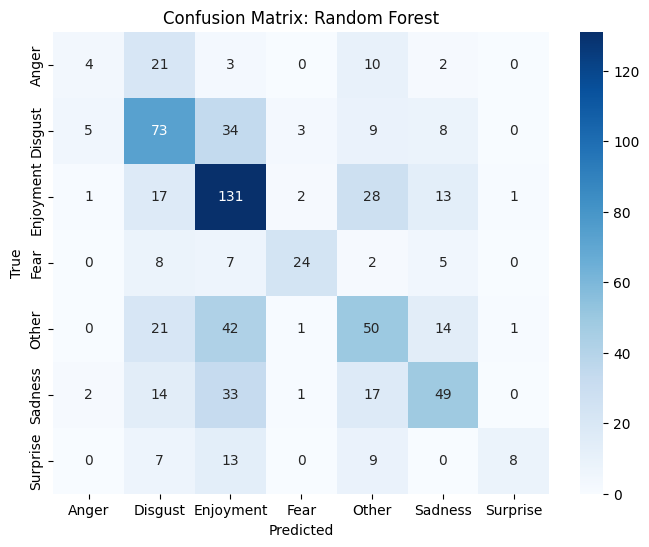

In [ ]:
for name, model in models.items():
    print(f"\n==== {name} ====")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, digits=4))
    print(f"F1 Macro: {f1_score(y_test, y_pred, average='macro'):.4f}")

    # Vẽ ma trận nhầm lẫn
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=sorted(df_test[col_label].unique()),
                yticklabels=sorted(df_test[col_label].unique()))
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()